# Pre-processing and Spliting

In [58]:
#imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report, accuracy_score, f1_score, recall_score

health = pd.read_csv('cleaned_heart_2020.csv')

In [2]:
health.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer,GenHealth_Number,SleepGroups,BMIGroups
0,0,16.60,1,0,0,3.0,30.0,0,1,55-59,...,1.0,1,Very good,5.0,1,0,1,4,1-6,Thinness
1,0,20.34,0,0,1,0.0,0.0,0,1,80 or older,...,0.0,1,Very good,7.0,0,0,0,4,7-12,Normal
2,0,26.58,1,0,0,20.0,30.0,0,0,65-69,...,1.0,1,Fair,8.0,1,0,0,2,7-12,Overweight
3,0,24.21,0,0,0,0.0,0.0,0,1,75-79,...,0.0,0,Good,6.0,0,0,1,3,1-6,Normal
4,0,23.71,0,0,0,28.0,0.0,1,1,40-44,...,0.0,1,Very good,8.0,0,0,0,4,7-12,Normal


In [3]:
#convert yes/no columns to category type
columns = ['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth',
       'Asthma', 'KidneyDisease', 'SkinCancer','GenHealth_Number',
       'SleepGroups', 'BMIGroups']
for i in columns:
    health[i] = health[i].astype('category')

In [4]:
health.dtypes

HeartDisease        category
BMI                  float64
Smoking             category
AlcoholDrinking     category
Stroke              category
PhysicalHealth       float64
MentalHealth         float64
DiffWalking         category
Sex                 category
AgeCategory         category
Race                category
Diabetic            category
PhysicalActivity    category
GenHealth           category
SleepTime            float64
Asthma              category
KidneyDisease       category
SkinCancer          category
GenHealth_Number    category
SleepGroups         category
BMIGroups           category
dtype: object

In [6]:
#Create dummy or indicator features for categorical variables
dummy_df = pd.get_dummies(health[['AgeCategory','GenHealth','GenHealth_Number','SleepGroups','BMIGroups', 'Race']], drop_first = True)
df = pd.concat([health, dummy_df], axis=1) #combine the dfs
df = df.drop(['AgeCategory','GenHealth','GenHealth_Number','SleepGroups','BMIGroups','Race'], axis=1) #remove the original columns
df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,Diabetic,...,BMIGroups_Obese,BMIGroups_Overweight,BMIGroups_Severe Thinness,BMIGroups_Severely Obese,BMIGroups_Thinness,Race_Asian,Race_Black,Race_Hispanic,Race_Other,Race_White
0,0,16.60,1,0,0,3.0,30.0,0,1,1.0,...,0,0,0,0,1,0,0,0,0,1
1,0,20.34,0,0,1,0.0,0.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
2,0,26.58,1,0,0,20.0,30.0,0,0,1.0,...,0,1,0,0,0,0,0,0,0,1
3,0,24.21,0,0,0,0.0,0.0,0,1,0.0,...,0,0,0,0,0,0,0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,1,0.0,...,0,0,0,0,0,0,0,0,0,1


In [7]:
#Split data into testing and training datasets
from sklearn.model_selection import train_test_split
X = df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=11, stratify=y)

In [8]:
#Standardize the magnitude of numeric features using a scaler
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']] = scaler.fit_transform(X_train[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']].values)
X_test[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']] = scaler.transform(X_test[['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime']].values)

In [ ]:
#scaled_features_df = pd.DataFrame(X_train_scaled, index=df.index, columns=['BMI_scaled', 'PhysicalHealth_scaled','MentalHealth_scaled', 'SleepTime_scaled'])
#scaled_df = df.drop(['BMI', 'PhysicalHealth','MentalHealth', 'SleepTime'], axis=1).join(scaled_features_df) #combine the dfs and drop unscaled columns
#scaled_df.head()

# Modeling

Logistic Regression


Gradient Boosting (check scikitlearn.classification)


Naive Bayes


Decision Tree


Random Forest


Support Vector Machines -- might take awhile

### Logistic Regression

In [9]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression() # Instantiate the model
logreg.fit(X_train, y_train) #fit the model
y_pred = logreg.predict(X_test)
y_pred_probs = logreg.predict_proba(X_test)[:, 1] # Predict probabilities of true by slicing the second column
print(y_pred_probs[:10]) #first 10 probabilities
#the probability of a diabetes diagnosis for the first 10 individuals in the test set ranges from 0.01 to 0.79. Now let's plot the ROC curve to visualize performance using different thresholds.

[0.00255282 0.01611326 0.08404242 0.02556136 0.04742623 0.07239188
 0.07214192 0.0594722  0.20700899 0.16076936]


C:\Users\andre\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


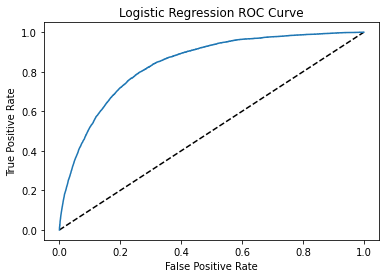

0.8406818490574168
[[57325  1159]
 [ 4886   589]]
              precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.34      0.11      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.56     63959
weighted avg       0.87      0.91      0.88     63959



In [26]:
#ROC Curve
#visualizes how the true positive rate (tpr) and false positive rate (fpr) vary as the decision threshold changes
#The ROC curve shows the trade-off between sensitivity (or TPR) and specificity (1 – FPR).
#Classifiers that give curves closer to the top-left corner indicate a better performance.

from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
plt.plot([0, 1], [0, 1], 'k--') #plot y = x dotted, which represents randomly guessing the class of each observation
plt.plot(fpr, tpr) # Plot true positive rate against false positive rate
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Logistic Regression ROC Curve')
plt.show()
#The ROC curve is above the dotted line, so the model performs better than randomly guessing the class of each observation.

#ROC AUC score
#The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. 
#The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes

print(roc_auc_score(y_test, y_pred_probs)) # Calculate ROC AUC score
print(confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print(classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
# A ROC AUC score of 0.8002 means this model is 60% better than a chance model at correctly predicting labels!

### Gradient Boosting (check scikitlearn.classification)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=1.0,max_depth=1, random_state=0).fit(X_train, y_train)
print('Gradient Boosting score' , gb.score(X_test, y_test))
print('Gradient Boosting confusion matrix' , '\n' , confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print('Gradient Boosting classification report' , '\n' , classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
print('Gradient Boosting Accuracy:' , accuracy_score(y_test, y_pred))
print('Gradient Boosting f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('Gradient Boosting Recall score:' , recall_score(y_test, y_pred))

Gradient Boosting score 0.916509013586829
Gradient Boosting confusion matrix 
 [[58484     0]
 [ 5475     0]]
Gradient Boosting classification report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     58484
           1       0.00      0.00      0.00      5475

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959

Gradient Boosting Accuracy: 0.9143982864022264
Gradient Boosting f1-score: 0.8735112563715003
Gradient Boosting Recall score: 0.0


C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### Naive Bayes

In [60]:
# training the model on training set
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
  
# making predictions on the testing set
y_pred = gnb.predict(X_test)
  
# comparing actual response values (y_test) with predicted response values (y_pred)
from sklearn import metrics

print('Naive Bayes confusion matrix' , '\n' , confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print('Niave Bayes classification report' , '\n' , classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
print('Naive Bayes Accuracy:' , accuracy_score(y_test, y_pred))
print('Naive Bayes f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('Naive Bayes Recall score:' , recall_score(y_test, y_pred))

Naive Bayes confusion matrix 
 [[45953 12531]
 [ 1664  3811]]
Niave Bayes classification report 
               precision    recall  f1-score   support

           0       0.97      0.79      0.87     58484
           1       0.23      0.70      0.35      5475

    accuracy                           0.78     63959
   macro avg       0.60      0.74      0.61     63959
weighted avg       0.90      0.78      0.82     63959

Naive Bayes Accuracy: 0.7780609452930783
Naive Bayes f1-score: 0.8219689834548302
Naive Bayes Recall score: 0.6960730593607306


### Decision Tree

In [61]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=0, max_depth=10)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)


print('Decision Tree confusion matrix' , '\n' , confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print('Decision Tree classification report' , '\n' , classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
print('Decision Tree Accuracy:' , accuracy_score(y_test, y_pred))
print('Decision Tree f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('Decision Tree Recall score:' , recall_score(y_test, y_pred))

Decision Tree confusion matrix 
 [[57925   559]
 [ 4958   517]]
Decision Tree classification report 
               precision    recall  f1-score   support

           0       0.92      0.99      0.95     58484
           1       0.48      0.09      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.70      0.54      0.56     63959
weighted avg       0.88      0.91      0.89     63959

Decision Tree Accuracy: 0.9137416157225723
Decision Tree f1-score: 0.886343576592258
Decision Tree Recall score: 0.09442922374429223


### Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=300, random_state = 1,n_jobs=-1)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
y_pred_prob = model_res.predict_proba(X_test)
y_pred_prob[:1]

print('Random Forest confusion matrix' , '\n' , confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print('Random Forest classification report' , '\n' , classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
print('Random Forest Accuracy:' , accuracy_score(y_test, y_pred))
print('Random Forest f1-score:', f1_score(y_test, y_pred, average='weighted'))
print('Random Forest Recall score:' , recall_score(y_test, y_pred))

Random Forest confusion matrix 
 [[57325  1159]
 [ 4886   589]]
Random Forest classification report 
               precision    recall  f1-score   support

           0       0.92      0.98      0.95     58484
           1       0.34      0.11      0.16      5475

    accuracy                           0.91     63959
   macro avg       0.63      0.54      0.56     63959
weighted avg       0.87      0.91      0.88     63959

Random Forest Accuracy: 0.9054863271783486
Random Forest f1-score: 0.8825615114732864
Random Forest Recall score: 0.10757990867579909


30


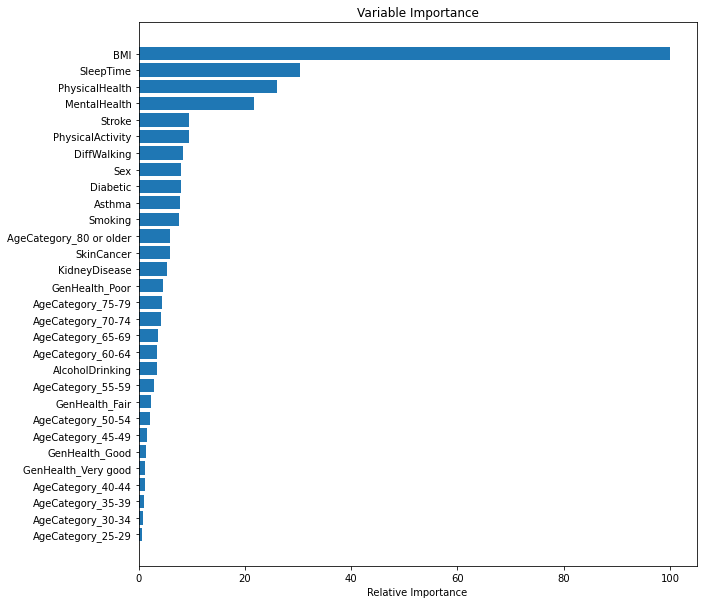

In [40]:
feature_importance = clf.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())[:30]
sorted_idx = np.argsort(feature_importance)[:30]

pos = np.arange(sorted_idx.shape[0]) + .5
print(pos.size)
sorted_idx.size
plt.figure(figsize=(10,10))
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

### Support Vector Machines -- might take awhile

In [56]:
from sklearn.svm import SVC

svc = SVC(kernel='linear')
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)

print('SVM confusion matrix' , '\n' , confusion_matrix(y_test, y_pred)) # Calculate the confusion matrix
print('SVM classification report' , '\n' , classification_report(y_test, y_pred)) # Calculate the classification report, which gives F1 score
print('SVM Accuracy:' , accuracy_score(y_test, y_pred))
print('SVM f1-score:', f1_score(y_test, y_pred, average='weighted'))

SVM confusion matrix 
 [[58484     0]
 [ 5475     0]]
SVM classification report 
               precision    recall  f1-score   support

           0       0.91      1.00      0.96     58484
           1       0.00      0.00      0.00      5475

    accuracy                           0.91     63959
   macro avg       0.46      0.50      0.48     63959
weighted avg       0.84      0.91      0.87     63959

SVM Accuracy: 0.9143982864022264
SVM f1-score: 0.8735112563715003


C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\andre\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
